<a href="https://colab.research.google.com/github/Ravi-Poddar26/missing-values/blob/master/H_M_V(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handling missing value on numerical data
there are two types:
1. Univariante imputer - (use same column data only)
2. Multivalue imputer - (use other colum data also)

# UNIVARIANTE IMPUTER:

1. mean/median

   2.ARbitory

   3.Ens of distribution

   4.Random value

# mean/median

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
data.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x = data.drop(columns='Survived')
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
X_train.isnull().sum()

,0
Age,148
Fare,36
Family,0


## by using pandas

In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [ ]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
16,2.0,29.1250,5,2.000000,2.00,29.1250,29.1250
325,36.0,135.6333,0,36.000000,36.00,135.6333,135.6333
119,2.0,31.2750,6,2.000000,2.00,31.2750,31.2750
76,NaN,7.8958,0,29.785904,28.75,7.8958,7.8958
361,29.0,27.7208,1,29.000000,29.00,27.7208,27.7208


In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2324.9576136149317
Fare Variance after mean imputation:  2324.2385256705547


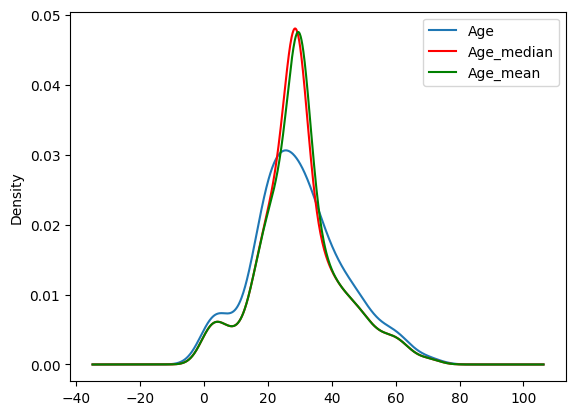

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

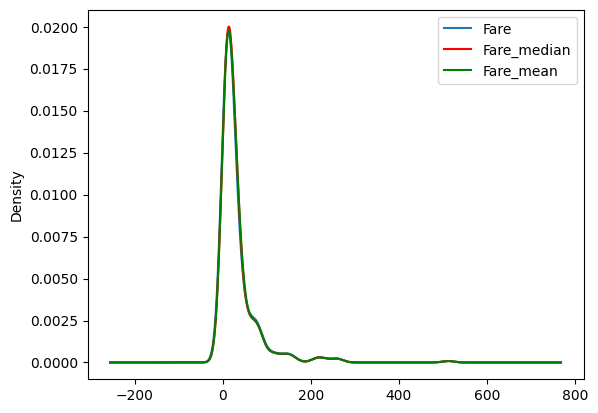

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,66.280487
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.404484
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,52.483705
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,54.710043
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,66.280487,2448.197914,16.404484,52.483705,54.710043,2324.238526,2324.957614


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.089604
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205710
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.085568
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.089149
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.999845
Fare_median,0.089604,1.000000,0.205710,0.085568,0.089149,0.999845,1.000000


<Axes: >

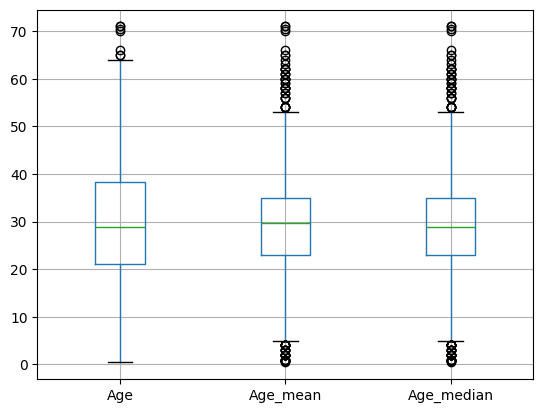

In [ ]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

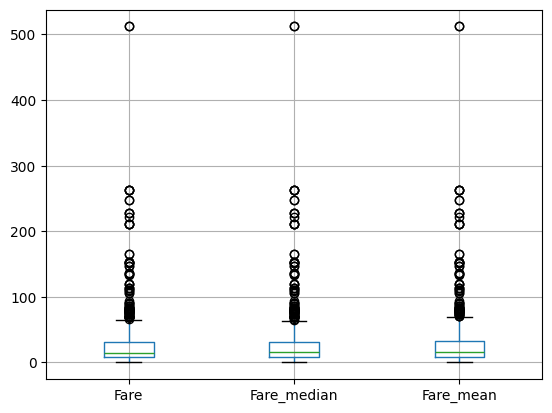

In [ ]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

we can using mean median because they make more outliers.

## Using sklearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state=2)

In [ ]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [ ]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [ ]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [ ]:
# In arbitory we only put the fix value in place of mean and mode and check all of these.